In [14]:
import wandb
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient() 

personal_key_for_api = user_secrets.get_secret("wandb-key")

! wandb login $personal_key_for_api

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [15]:
# Pip install method 
%pip install ultralytics
!pip install ultralytics

Note: you may need to restart the kernel to use updated packages.


In [16]:
# import all necessary libraries
import os
import cv2
import glob
import random
import requests
import pathlib
import warnings
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image
from IPython.display import Video
from ultralytics import YOLO
from tqdm.notebook import trange, tqdm

warnings.filterwarnings('ignore')
sns.set(style='darkgrid')

np.random.seed(42)

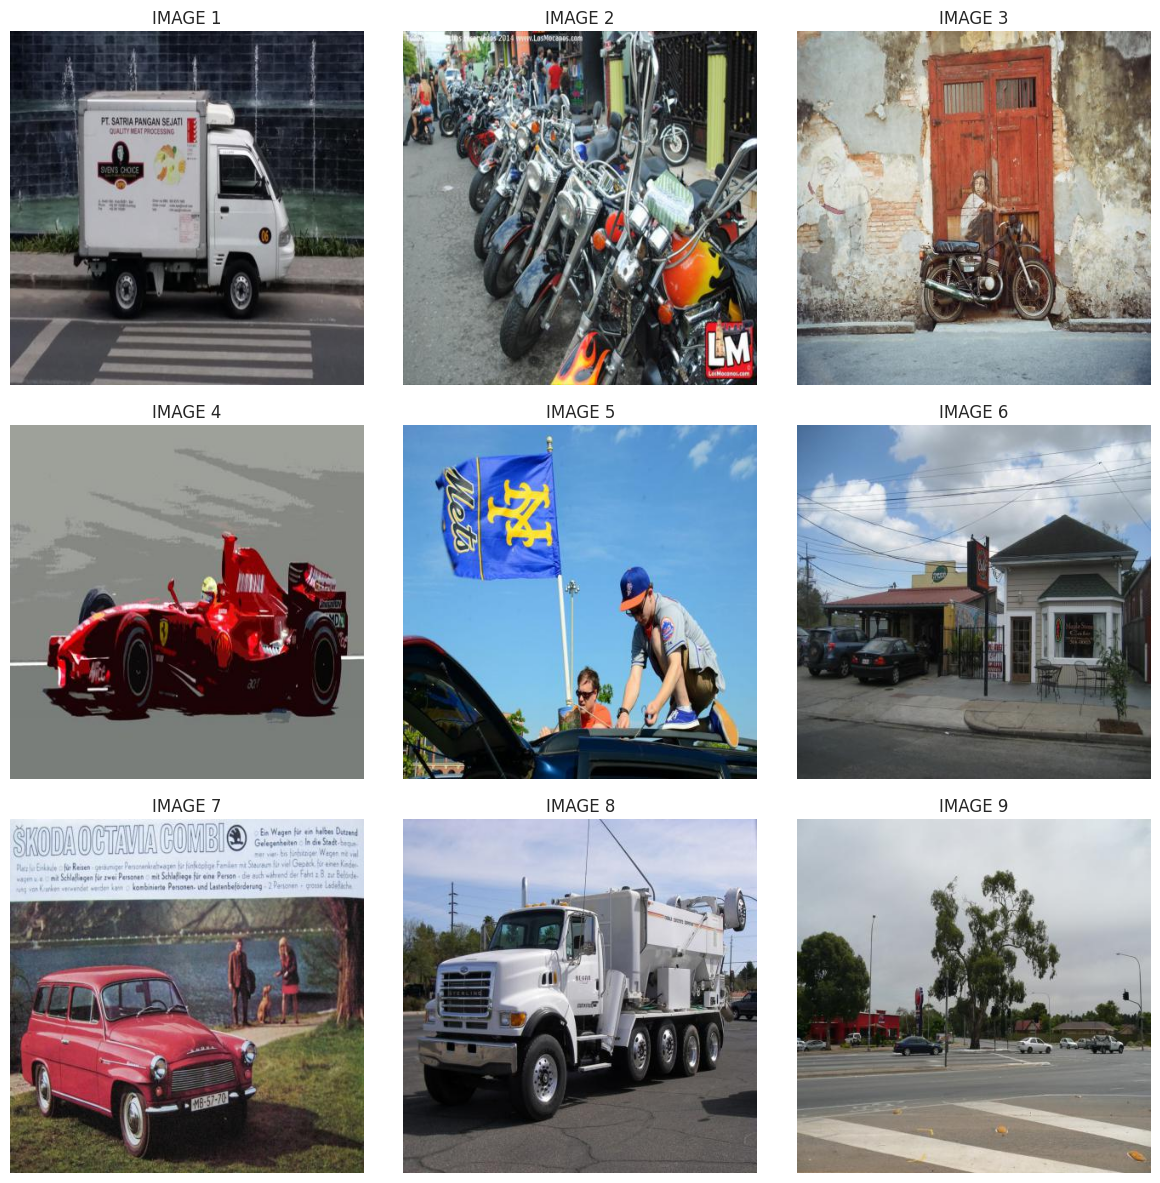

In [17]:
# Path to the folder containing images
train_img_dir = '/kaggle/input/car-detection/Cars Detection/test/images'

# Set numble of sample to 9
num_samples = 9

image_files = os.listdir(train_img_dir)

# Randomly select 9 images
rand_imgs = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3,3, figsize = (12, 12))

# Iterate through the selected images and display them on the grid
for i in range(num_samples):
    image = rand_imgs[i]
    ax = axes[i // 3, i%3]
    ax.imshow(plt.imread(os.path.join(train_img_dir, image)))
    ax.set_title(f'IMAGE {i+1}')
    ax.axis('off')
    
# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [18]:
# Path to the main folders
main_folders = [
    '/kaggle/input/car-detection/Cars Detection/train',
    '/kaggle/input/car-detection/Cars Detection/test',
    '/kaggle/input/car-detection/Cars Detection/valid'
]

# Iterate through each main folder
for main_folder in main_folders:
    print(f"\nMain Folder: {main_folder}")
    
    # Subfolders under the main folder (images and labels)
    subfolders = ['images', 'labels']
    
    # Iterate through each subfolder
    for subfolder in subfolders:
        # Full path to the subfolder
        subfolder_path = os.path.join(main_folder, subfolder)
        
        # Count the number of files in the subfolder
        file_count = len(os.listdir(subfolder_path))
        
        # Print the results
        print(f"  {subfolder.capitalize()} Folder: {file_count} files")


Main Folder: /kaggle/input/car-detection/Cars Detection/train
  Images Folder: 878 files
  Labels Folder: 878 files

Main Folder: /kaggle/input/car-detection/Cars Detection/test
  Images Folder: 126 files
  Labels Folder: 126 files

Main Folder: /kaggle/input/car-detection/Cars Detection/valid
  Images Folder: 250 files
  Labels Folder: 250 files


In [19]:
import yaml

# Specify the path to the YAML file
yaml_file_path = '/kaggle/input/car-detection/Cars Detection/data.yaml'

# Load the YAML file
with open(yaml_file_path, 'r') as file:
    data = yaml.safe_load(file)

# Extract and display the class names
class_names = data['names']
print("Class Names:", class_names)

Class Names: ['Ambulance', 'Bus', 'Car', 'Motorcycle', 'Truck']


In [20]:
# Path to the images folder
images_folder = '/kaggle/input/car-detection/Cars Detection/train/images'

# Get a list of all image files in the folder
image_files = [f for f in os.listdir(images_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Choose a random image from the list
random_image = random.choice(image_files)

# Construct the full path to the random image
random_image_path = os.path.join(images_folder, random_image)

# Open the image using PIL
image = Image.open(random_image_path)

# Get the size, mode (channels), and number of channels of the image
image_size = image.size
image_mode = image.mode
num_channels = image.layers if hasattr(image, 'layers') else len(image.getbands())

# Print the details of the random image
print(f"Random Image: {random_image}")
print(f"Image Size: {image_size}")
print(f"Image Mode (Channels): {image_mode}")
print(f"Number of Channels: {num_channels}")

Random Image: e887c2fbb6a47737_jpg.rf.afba00e4c1732a507d0701c3f8339dcc.jpg
Image Size: (416, 416)
Image Mode (Channels): RGB
Number of Channels: 3


In [21]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt")


image 1/1 /kaggle/input/car-detection/Cars Detection/test/images/be3f71308b3598e9_jpg.rf.u0lWU3LrXooFaQYTPa34.jpg: 416x416 1 truck, 11.1ms
Speed: 0.9ms preprocess, 11.1ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 /kaggle/input/car-detection/Cars Detection/test/images/31d30eccf56cac5f_jpg.rf.c8541ffad78068c67ad369640d6c2b47.jpg: 416x416 2 persons, 10 motorcycles, 6.9ms
Speed: 0.8ms preprocess, 6.9ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 /kaggle/input/car-detection/Cars Detection/test/images/9fdf0bf1160fca8e_jpg.rf.ERTEMjgijaUbIUeFSoNX.jpg: 416x416 1 motorcycle, 6.7ms
Speed: 0.7ms preprocess, 6.7ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 /kaggle/input/car-detection/Cars Detection/test/images/958efc095c686ef6_jpg.rf.56nx09qgfDF5ZntcEzXO.jpg: 416x416 1 truck, 6.4ms
Speed: 0.7ms preprocess, 6.4ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 /kaggle/inpu

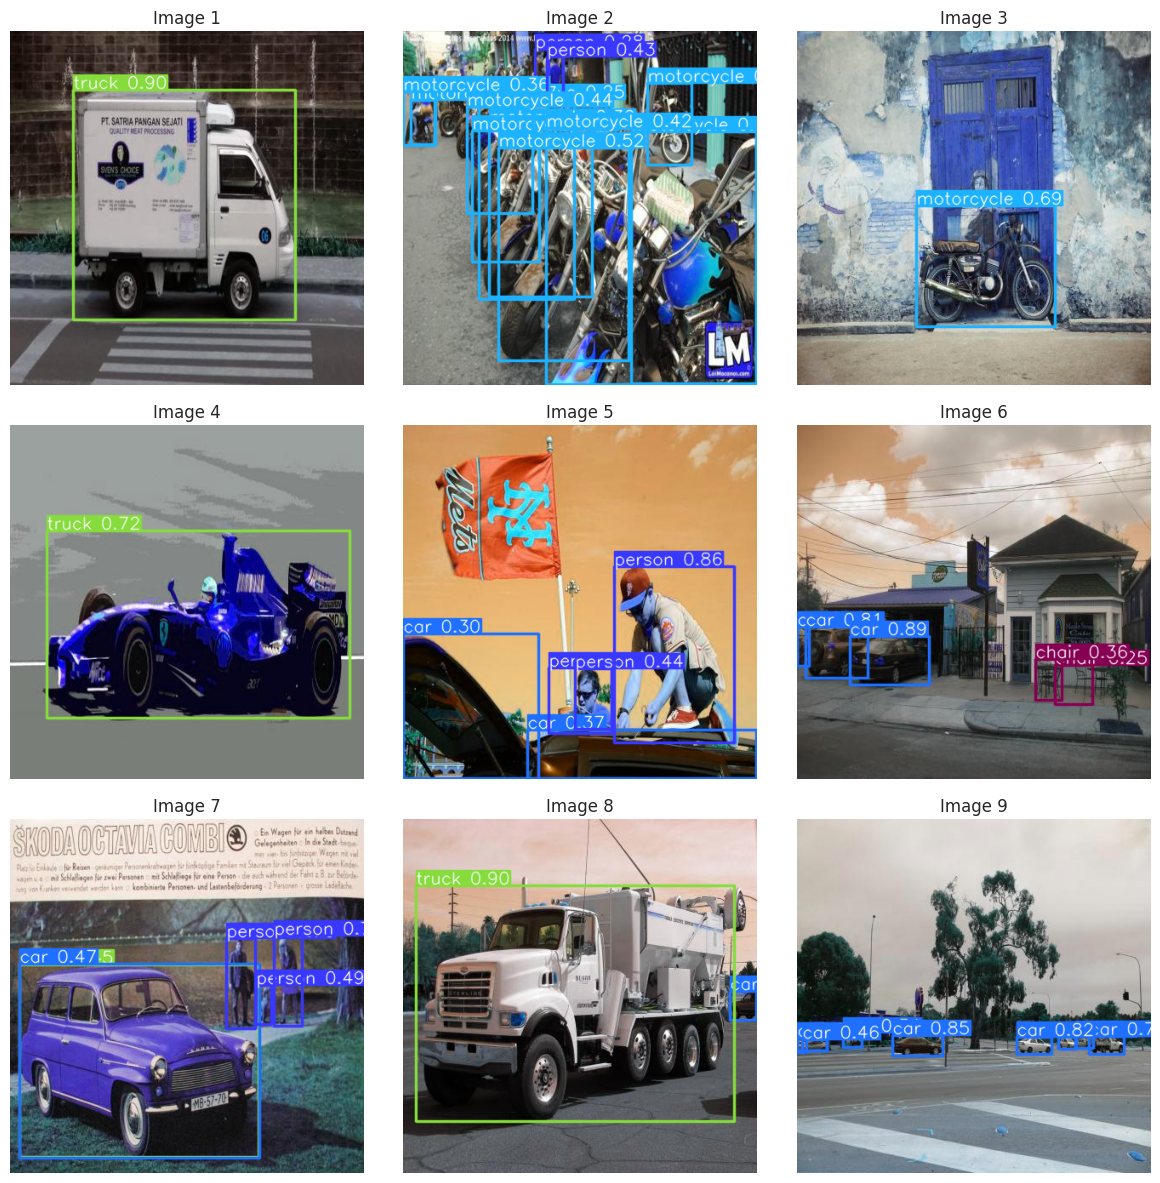

In [22]:
fig, axes = plt.subplots(3,3, figsize = (12, 12))
for i in range(num_samples):
    image = rand_imgs[i]
    ax = axes[i // 3, i%3]
    result_predict = model.predict(source = os.path.join(train_img_dir, image), imgsz = (416))
    ax.imshow(result_predict[0].plot())
    ax.set_title(f'Image {i+1}')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [23]:
# Clear the contents of the working directory
!rm -rf /kaggle/working/*

In [24]:
# Build from YAML 
Final_model = YOLO('yolov8n.yaml').load('yolov8n.pt')  

# Training
Result_Final_model = Final_model.train(data="/kaggle/input/car-detection/Cars Detection/data.yaml",epochs=50, imgsz = 416, batch = 16 ,lr0=0.001, dropout= 0.1, device = 0)

100%|██████████| 6.23M/6.23M [00:00<00:00, 106MB/s]

Transferred 355/355 items from pretrained weights
Ultralytics YOLOv8.2.2 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)


engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/kaggle/input/car-detection/Cars Detection/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.1, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, 

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/input/car-detection/Cars Detection/train/labels... 878 images, 0 backgrounds, 0 corrupt: 100%|██████████| 878/878 [00:01<00:00, 859.89it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/car-detection/Cars Detection/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /kaggle/input/car-detection/Cars Detection/valid/labels... 250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 250/250 [00:00<00:00, 724.74it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/car-detection/Cars Detection/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       1.1G      1.127      2.773      1.298         30        416: 100%|██████████| 55/55 [00:08<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.76it/s]

                   all        250        454      0.502      0.285      0.356      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.04G      1.185      2.058      1.329         49        416: 100%|██████████| 55/55 [00:06<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.84it/s]

                   all        250        454      0.342      0.414      0.357      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.02G      1.175      1.922      1.331         61        416: 100%|██████████| 55/55 [00:06<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.70it/s]

                   all        250        454      0.602      0.365      0.385      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.02G      1.229      1.962      1.359         52        416: 100%|██████████| 55/55 [00:07<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.15it/s]

                   all        250        454      0.313      0.303      0.288      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.01G      1.237      1.883      1.363         35        416: 100%|██████████| 55/55 [00:06<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.40it/s]


                   all        250        454      0.269      0.476      0.369      0.235

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         1G      1.224      1.781      1.342         57        416: 100%|██████████| 55/55 [00:06<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.49it/s]

                   all        250        454      0.761      0.339      0.435      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.01G      1.171      1.699       1.32         48        416: 100%|██████████| 55/55 [00:06<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.36it/s]

                   all        250        454      0.465      0.496      0.452      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.02G      1.135      1.701      1.308         34        416: 100%|██████████| 55/55 [00:06<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.92it/s]

                   all        250        454      0.574      0.414      0.479      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.01G      1.111      1.589       1.28         57        416: 100%|██████████| 55/55 [00:06<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.46it/s]

                   all        250        454      0.465      0.491      0.464      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         1G       1.12      1.545      1.282         44        416: 100%|██████████| 55/55 [00:06<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.11it/s]

                   all        250        454      0.454      0.517      0.507      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.01G      1.106      1.506      1.282         56        416: 100%|██████████| 55/55 [00:06<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.91it/s]

                   all        250        454      0.646      0.442       0.51      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.02G      1.059      1.432      1.239         40        416: 100%|██████████| 55/55 [00:06<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.08it/s]

                   all        250        454      0.585       0.57      0.551      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         1G       1.02      1.333      1.217         46        416: 100%|██████████| 55/55 [00:06<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.82it/s]

                   all        250        454      0.642      0.488      0.522       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         1G      1.038      1.339      1.228         64        416: 100%|██████████| 55/55 [00:06<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.75it/s]

                   all        250        454      0.695      0.424      0.511      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         1G      1.013      1.302      1.224         53        416: 100%|██████████| 55/55 [00:06<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.69it/s]

                   all        250        454      0.589      0.534      0.542      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.01G      1.013       1.28      1.221         51        416: 100%|██████████| 55/55 [00:06<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.15it/s]

                   all        250        454      0.737      0.429      0.499      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.02G     0.9948      1.225      1.207         58        416: 100%|██████████| 55/55 [00:06<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.98it/s]

                   all        250        454      0.577      0.526      0.553      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.01G     0.9885      1.199      1.201         55        416: 100%|██████████| 55/55 [00:06<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.12it/s]

                   all        250        454      0.528      0.491      0.521      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         1G      1.009       1.23      1.203         49        416: 100%|██████████| 55/55 [00:06<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.83it/s]

                   all        250        454      0.585      0.559      0.557      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.02G     0.9421      1.142      1.167         42        416: 100%|██████████| 55/55 [00:06<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.65it/s]

                   all        250        454      0.615      0.528       0.55      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         1G     0.9379      1.102       1.17         59        416: 100%|██████████| 55/55 [00:06<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.72it/s]

                   all        250        454      0.686      0.456      0.544      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         1G      0.939      1.101      1.167         72        416: 100%|██████████| 55/55 [00:06<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.20it/s]

                   all        250        454      0.664      0.521      0.559      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         1G     0.9039      1.078      1.157         61        416: 100%|██████████| 55/55 [00:06<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.83it/s]

                   all        250        454        0.6       0.45      0.523      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.01G      0.938      1.095      1.171         47        416: 100%|██████████| 55/55 [00:06<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.77it/s]

                   all        250        454      0.593      0.528      0.528      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         1G     0.8877     0.9936      1.145         30        416: 100%|██████████| 55/55 [00:06<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.33it/s]

                   all        250        454      0.599      0.537      0.542      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.01G     0.8852     0.9699      1.142         47        416: 100%|██████████| 55/55 [00:06<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.12it/s]

                   all        250        454      0.518      0.518      0.525      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.01G     0.8731     0.9468      1.135         49        416: 100%|██████████| 55/55 [00:06<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.06it/s]

                   all        250        454      0.668      0.539      0.591      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.02G     0.8571     0.9576      1.126         39        416: 100%|██████████| 55/55 [00:06<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.19it/s]

                   all        250        454      0.655      0.469      0.545      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         1G      0.859     0.9172      1.119         48        416: 100%|██████████| 55/55 [00:06<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.25it/s]

                   all        250        454      0.592      0.522       0.55      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         1G       0.84     0.8961      1.109         44        416: 100%|██████████| 55/55 [00:06<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.40it/s]

                   all        250        454      0.657      0.563      0.587      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         1G     0.8305     0.8821      1.097         47        416: 100%|██████████| 55/55 [00:06<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.13it/s]

                   all        250        454      0.554      0.578      0.574      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.02G     0.8189     0.8505      1.102         49        416: 100%|██████████| 55/55 [00:06<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.00it/s]

                   all        250        454      0.568      0.619      0.598      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         1G     0.8066     0.8335      1.092         54        416: 100%|██████████| 55/55 [00:06<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.29it/s]

                   all        250        454      0.592      0.579      0.588       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         1G     0.8068     0.8356      1.095         54        416: 100%|██████████| 55/55 [00:06<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.86it/s]

                   all        250        454      0.654      0.582      0.578      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         1G     0.7824     0.8071      1.085         54        416: 100%|██████████| 55/55 [00:06<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.42it/s]

                   all        250        454      0.646      0.492       0.56      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.02G     0.7839     0.8065      1.088         51        416: 100%|██████████| 55/55 [00:06<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.60it/s]

                   all        250        454      0.676      0.527      0.579      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         1G     0.7825     0.7986      1.087         67        416: 100%|██████████| 55/55 [00:06<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.04it/s]

                   all        250        454      0.654      0.536      0.581      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.01G       0.76     0.7556       1.07         63        416: 100%|██████████| 55/55 [00:06<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.90it/s]

                   all        250        454      0.644      0.595      0.623      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         1G     0.7553     0.7696      1.069         46        416: 100%|██████████| 55/55 [00:06<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.93it/s]

                   all        250        454      0.637      0.544      0.598      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.02G     0.7217     0.7416      1.043         59        416: 100%|██████████| 55/55 [00:06<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.13it/s]

                   all        250        454      0.614      0.567      0.587      0.443


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         1G     0.6651     0.6536     0.9999         26        416: 100%|██████████| 55/55 [00:07<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.12it/s]

                   all        250        454      0.593      0.571      0.562      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         1G     0.6464     0.6107     0.9966         20        416: 100%|██████████| 55/55 [00:06<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.17it/s]

                   all        250        454      0.617      0.582      0.614      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         1G     0.6378     0.5726     0.9913         33        416: 100%|██████████| 55/55 [00:06<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.20it/s]

                   all        250        454      0.623      0.591      0.608      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.02G     0.6339     0.5389     0.9752         21        416: 100%|██████████| 55/55 [00:06<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.18it/s]

                   all        250        454      0.585      0.586      0.584      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         1G     0.5993     0.5208     0.9824         30        416: 100%|██████████| 55/55 [00:06<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.01it/s]

                   all        250        454      0.638      0.585      0.598      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         1G      0.592      0.514     0.9661         24        416: 100%|██████████| 55/55 [00:06<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.05it/s]

                   all        250        454      0.589      0.592       0.58      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         1G     0.5851     0.5024     0.9696         24        416: 100%|██████████| 55/55 [00:06<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.34it/s]

                   all        250        454      0.661      0.551      0.585      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.02G     0.5749      0.486     0.9601         18        416: 100%|██████████| 55/55 [00:06<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.01it/s]

                   all        250        454      0.614       0.57       0.59      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         1G     0.5791     0.4711     0.9589         27        416: 100%|██████████| 55/55 [00:06<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.09it/s]

                   all        250        454      0.649      0.554       0.58      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         1G     0.5545     0.4664     0.9507         29        416: 100%|██████████| 55/55 [00:06<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.95it/s]

                   all        250        454      0.598      0.609      0.588      0.452



50 epochs completed in 0.131 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.2 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8n summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.47it/s]


                   all        250        454      0.644      0.595      0.622      0.466
             Ambulance        250         64      0.721      0.812      0.853      0.732
                   Bus        250         46       0.71      0.652      0.752      0.606
                   Car        250        238      0.588      0.471      0.512      0.358
            Motorcycle        250         46      0.603      0.739      0.582      0.347
                 Truck        250         60      0.596        0.3      0.413      0.286
Speed: 0.1ms preprocess, 1.2ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train


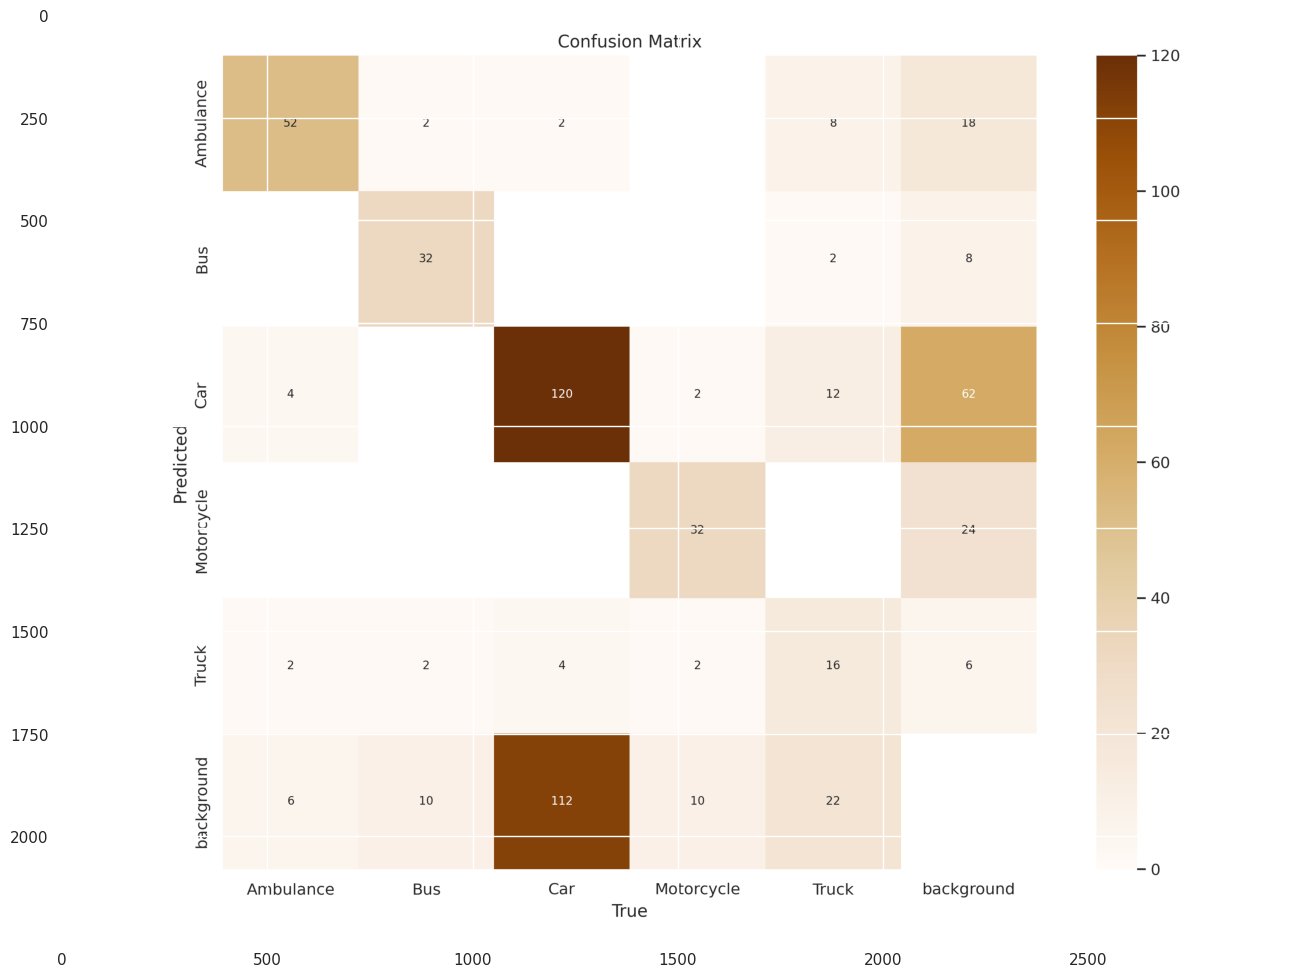

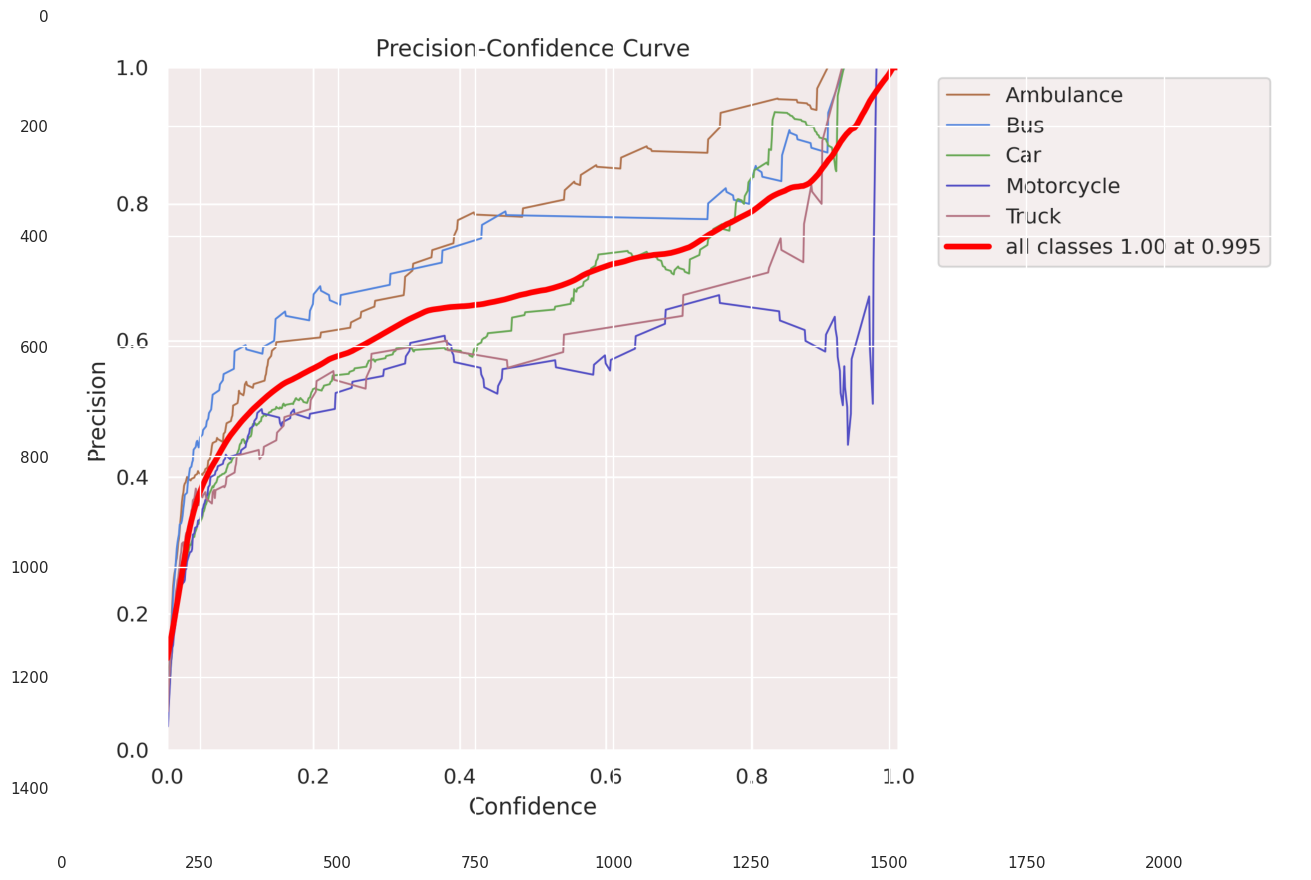

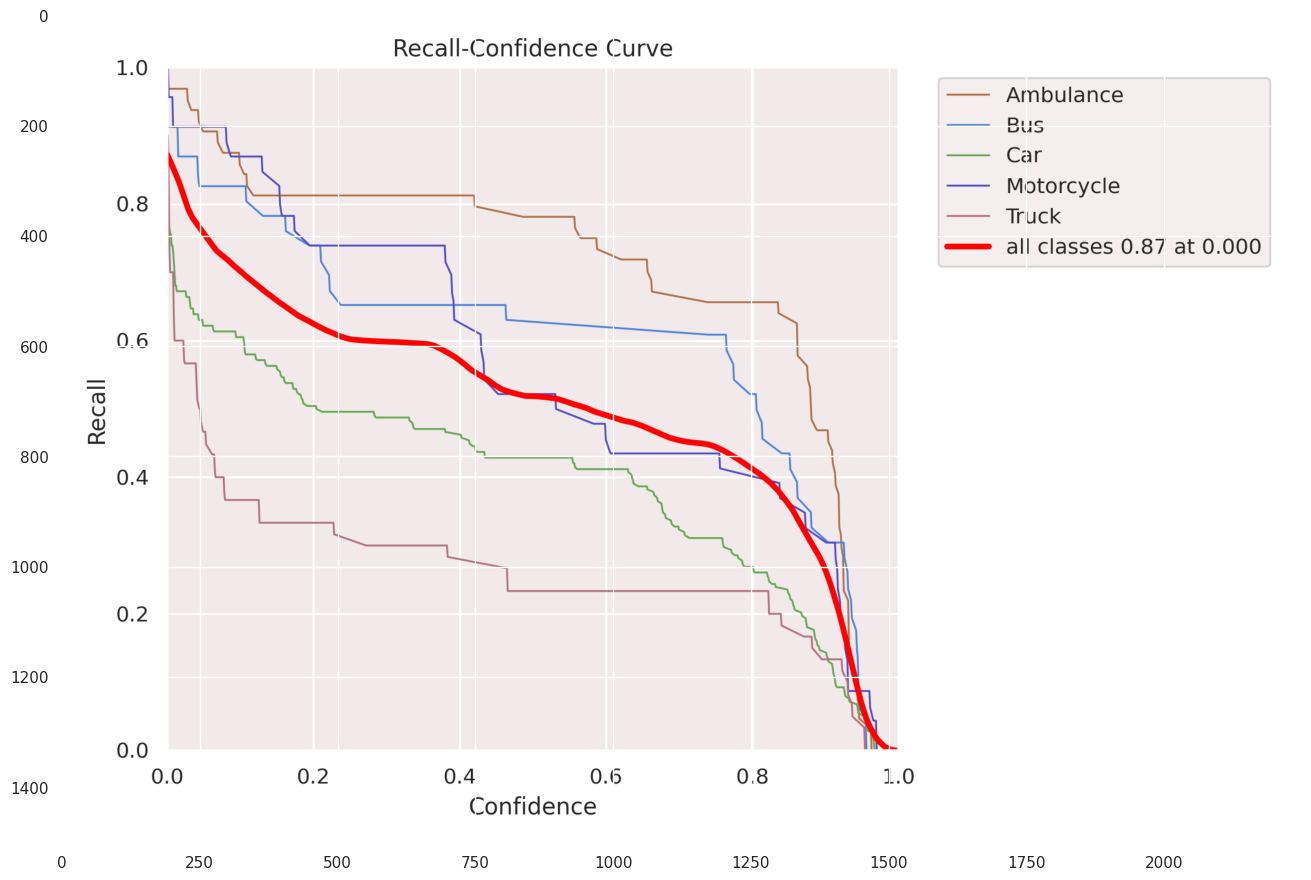

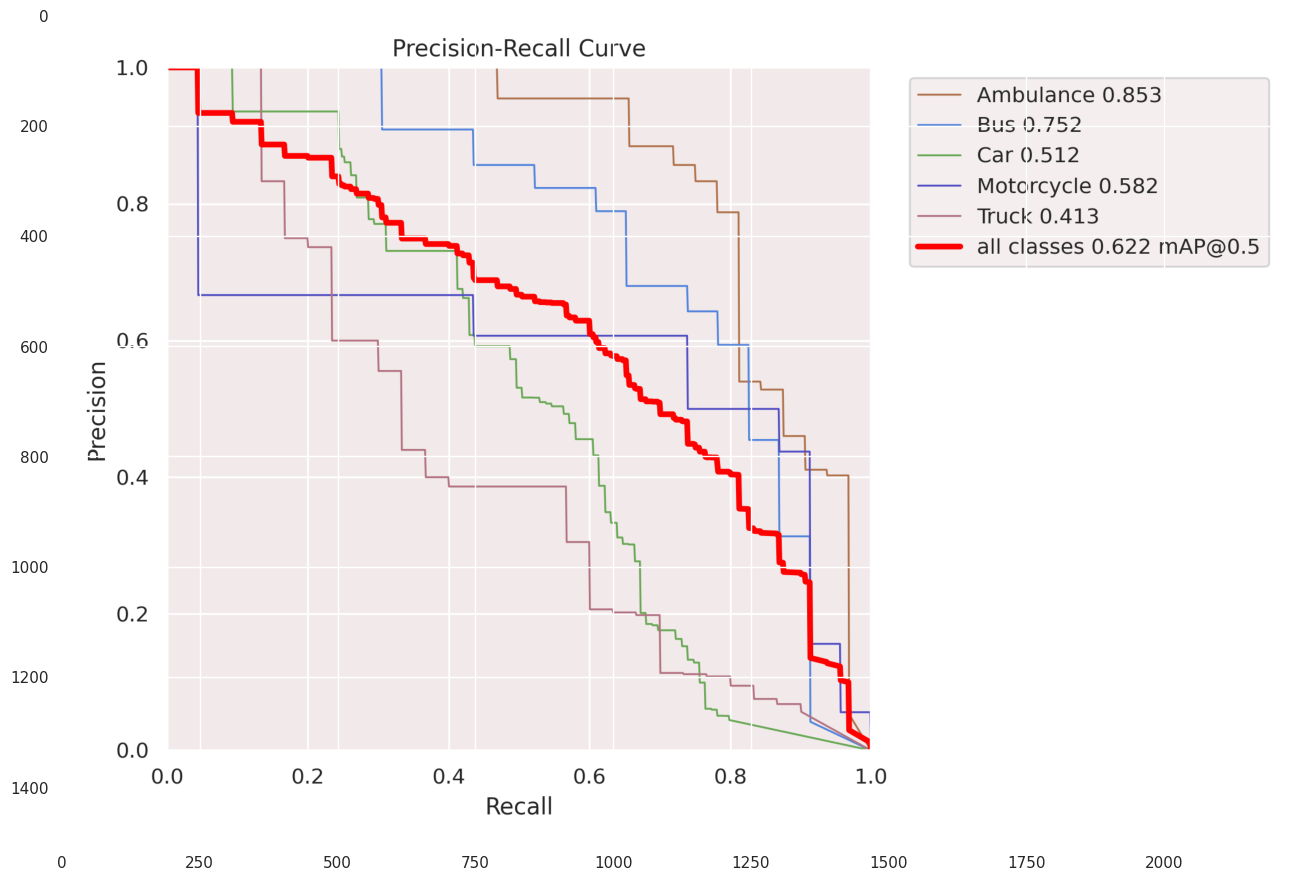

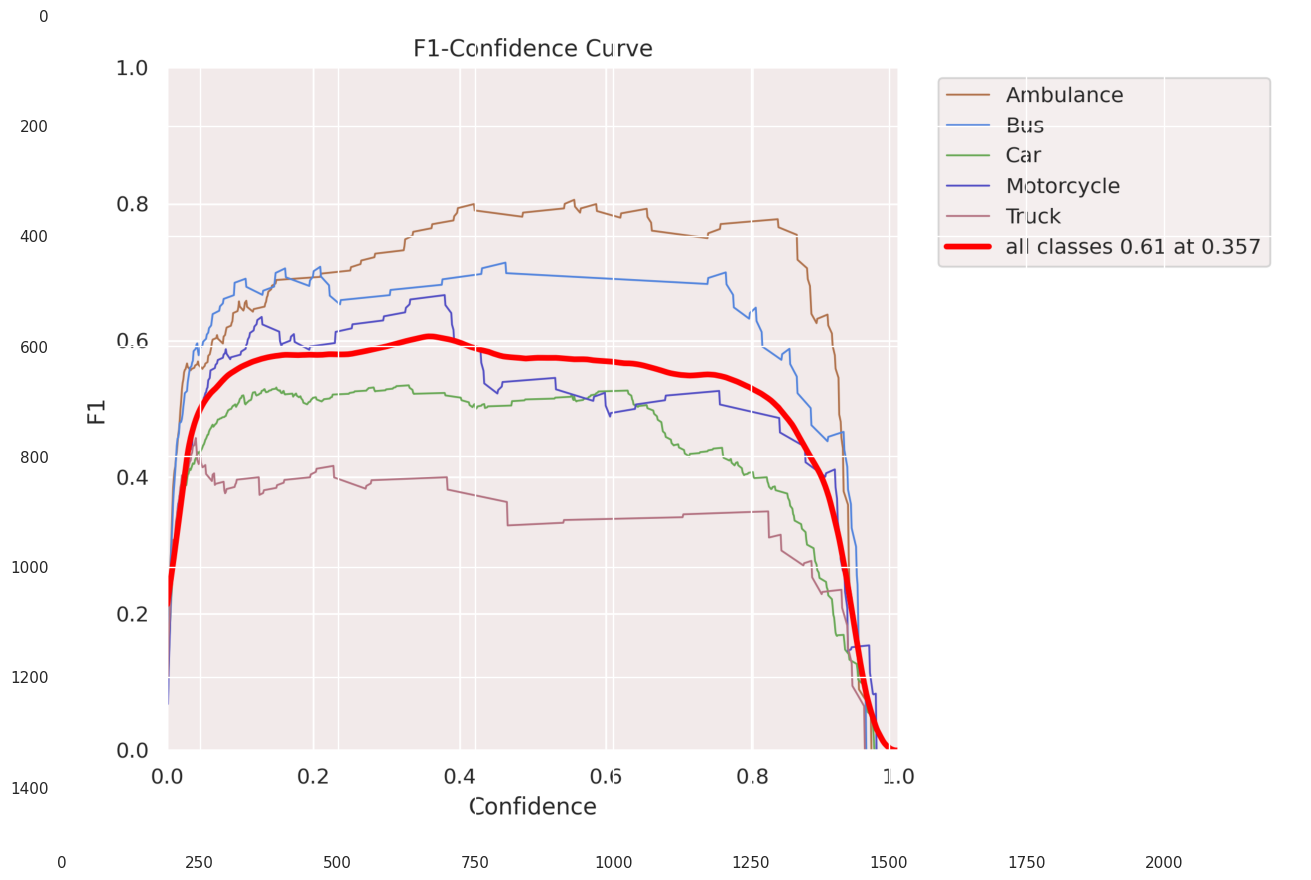

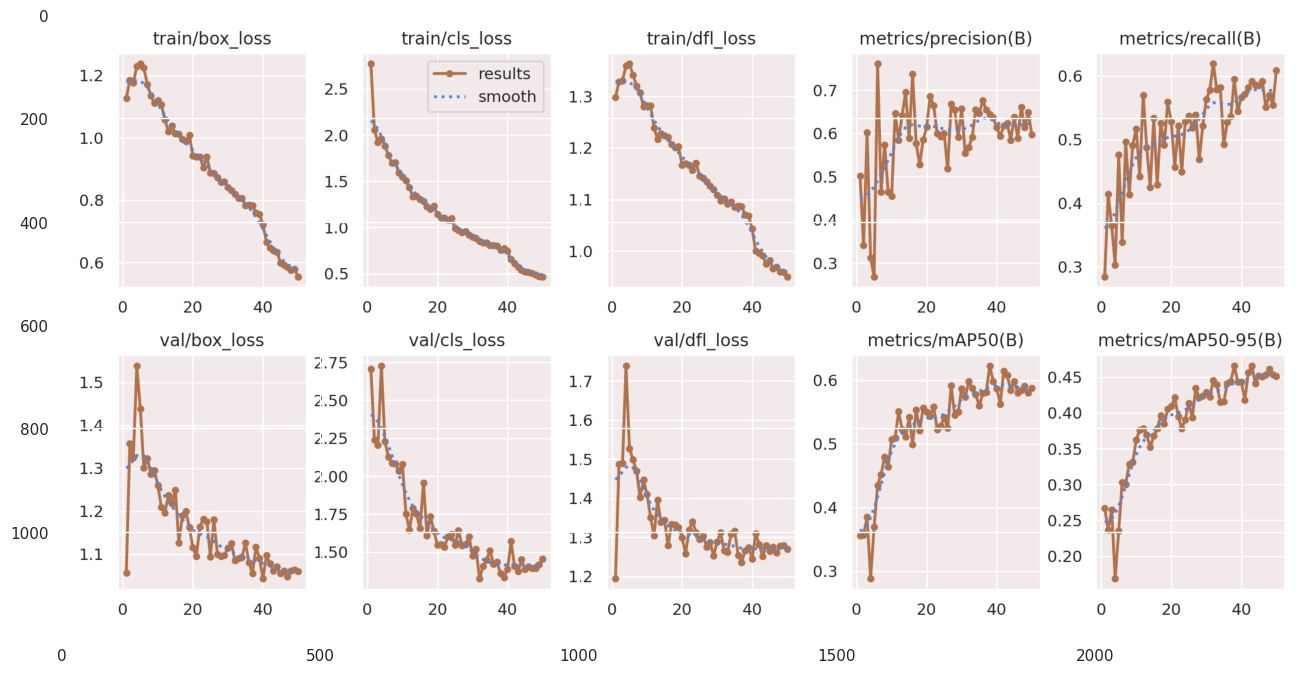

In [25]:
list_of_metrics = ["confusion_matrix.png", "P_curve.png", "R_curve.png", "PR_curve.png", "F1_curve.png", "results.png"]
for i in list_of_metrics:
    
    image = cv2.imread(f'/kaggle/working/runs/detect/train/{i}')
    plt.figure(figsize=(16, 12))
    plt.imshow(image)
    plt.show()


image 1/1 /kaggle/input/car-detection/Cars Detection/test/images/9fdf0bf1160fca8e_jpg.rf.183a3d9dfcbbd5ad78f2148712430881.jpg: 416x416 1 Motorcycle, 11.2ms
Speed: 0.8ms preprocess, 11.2ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 /kaggle/input/car-detection/Cars Detection/test/images/6e85d4ef31b5eed3_jpg.rf.01ea5ec813abb42ce956650ad5ea6a35.jpg: 416x416 1 Car, 7.3ms
Speed: 2.1ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 /kaggle/input/car-detection/Cars Detection/test/images/b7cc71d4f2108d9c_jpg.rf.k85zClsDgxtxBGb6PUbH.jpg: 416x416 1 Ambulance, 6.9ms
Speed: 0.7ms preprocess, 6.9ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 /kaggle/input/car-detection/Cars Detection/test/images/6d5d24e86c1ff260_jpg.rf.f7acfa6e4c8049353976699fcd4d515f.jpg: 416x416 1 Bus, 6.6ms
Speed: 0.8ms preprocess, 6.6ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 /kaggl

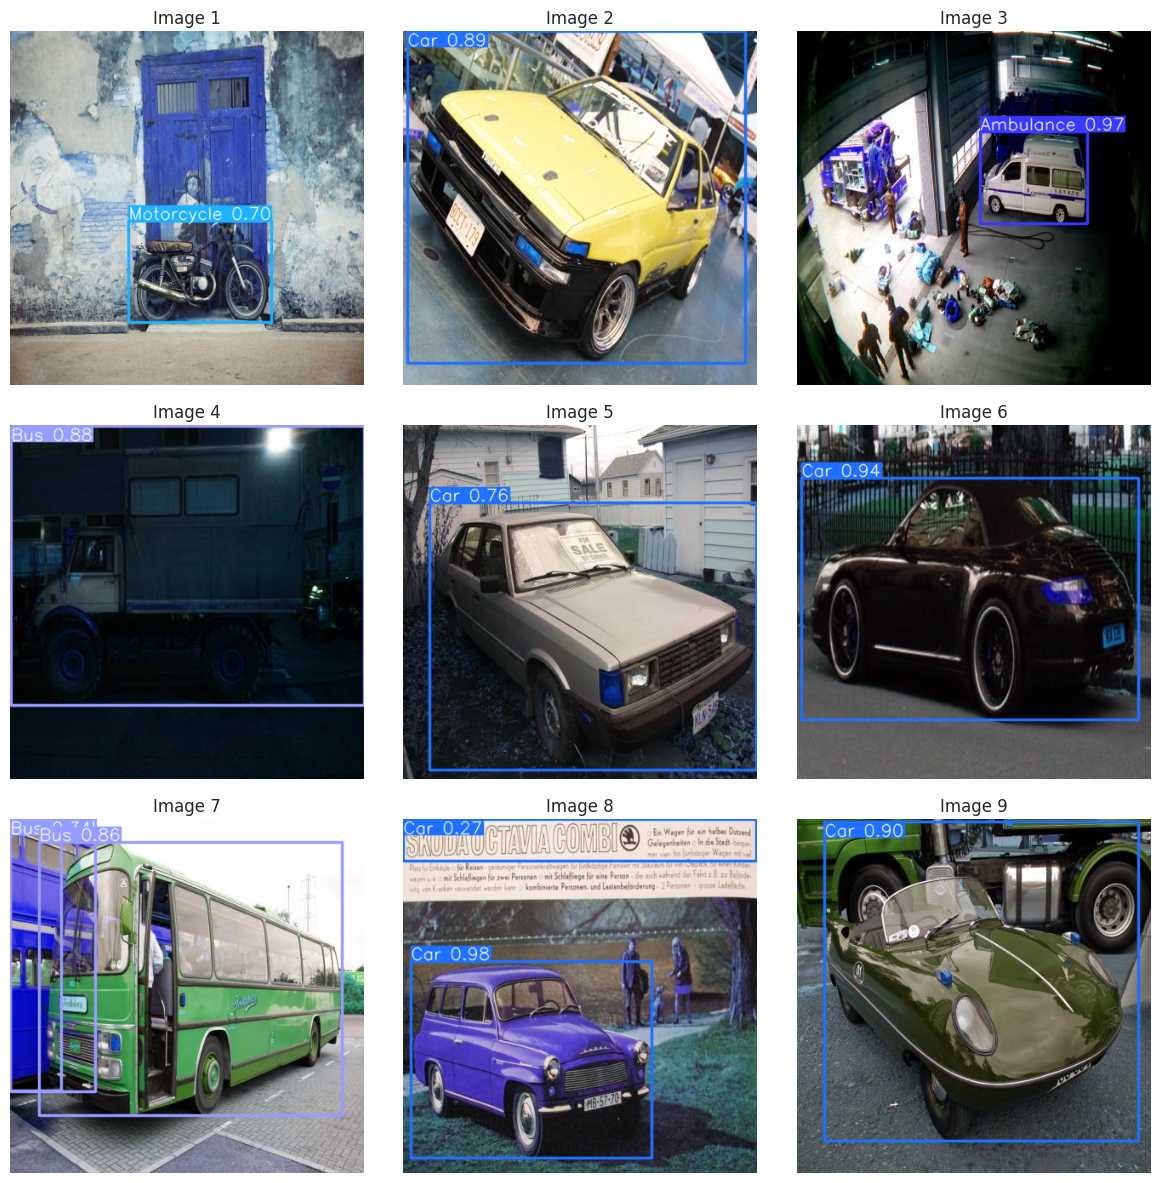

In [26]:
test_img_dir = '/kaggle/input/car-detection/Cars Detection/test/images'
num_samples = 9
image_files = os.listdir(test_img_dir)
test_imgs = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3,3, figsize = (12, 12))
for i in range(num_samples):
    image = test_imgs[i]
    ax = axes[i // 3, i%3]
    result_predict = Final_model.predict(source = os.path.join(test_img_dir, image), imgsz = (416))
    ax.imshow(result_predict[0].plot())
    ax.set_title(f'Image {i+1}')
    ax.axis('off')
plt.tight_layout()
plt.show()